In [154]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

# 1. Ordinary Least Squares

### In this kernel we will use weight-height dataset. Here we have only two variables. In our example we will consider that weight is an independent variable, and height - dependent one. So we will try to predict height using weight. 

In [155]:
DATA_PATH = ('/home/kap/DS/DataSets/')
df = pd.read_csv(DATA_PATH + 'weights_heights.csv')

In [156]:
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [157]:
df.shape

(25000, 3)

### Let us build a scatter plot to see if our variables corelate.

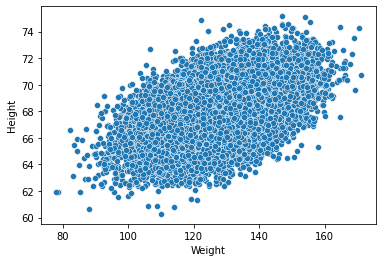

In [158]:
sns.scatterplot(x='Weight', y='Height', data=df);

### To predict Height based on Weight, using a linear model, we need to fit a line. The main task is to consider which line will give us the best quality of prediction.

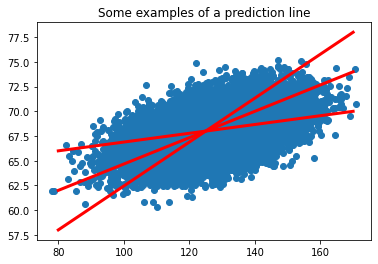

In [159]:
plt.scatter(x='Weight', y='Height', data=df);
plt.plot([80, 170], [62, 74], c='r', linewidth=3);
plt.plot([80, 170], [58, 78], c='r', linewidth=3);
plt.plot([80, 170], [66, 70], c='r', linewidth=3);

plt.title('Some examples of a prediction line');

### Before we will implement the models, let us see the baseline. Suppose, that the best prediction we can perform is prediction based on average value. Input - any weight, output - average height.
### We will use mean square error (MSE) as metric. MSE represents variance. Less --> better.

In [160]:
y_mean = np.ones((y_test.shape[0], 1))
y_mean = y_mean * np.mean(y_train)

In [161]:
Baseline = mean_squared_error(y_test, y_mean) # - Baseline
Baseline

3.6334909507241644

### The default method that using in sklearn linear regressor is Ordinary Least Squares (OLS). Here we will implement it.
### Let us split data, scale it and transform to matrix form.

In [162]:
X = df['Weight'].values
y = df['Height'].values

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [164]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

In [184]:
# Here we will add column of ones. This column represents variable X_0 = 1. 
# This is necessary to perform matrix calculations.

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [166]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17500, 2), (17500,), (7500, 2), (7500,))

### We will not cover math behind a matrix form of OLS. Here is the formula:


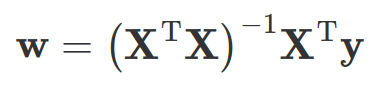

In [167]:
%%time

# w - vector of weights in linear equation y = w0X0 + w1x1 (analog LinearRegressor.fit(X_train, y_train))

w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)), y_train)
w

CPU times: user 0 ns, sys: 7.89 ms, total: 7.89 ms
Wall time: 8.84 ms


array([67.98930835,  0.94537278])

### Now we will graph our regression line.

In [168]:
w1, w2 = scaler.transform([[78],[171]]);
y1, y2 = np.dot((1, w1), w)[0], np.dot((1, w2), w)[0];

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


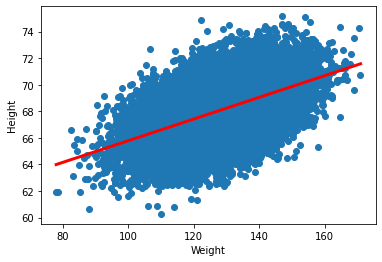

In [169]:
plt.scatter(x='Weight', y='Height', data=df);
plt.plot([78, 171], [y1, y2], c='r', linewidth=3);

plt.xlabel('Weight')
plt.ylabel('Height');

### We got weights, so now we can do prediction. To get 'y_pred' we need to multiplicate matrix X and vector w.

In [170]:
y_pred = np.dot(X_test, w)

In [171]:
mse_OLS = mean_squared_error(y_test, y_pred) # As we can see, we beat our Baseline (3.63) pretty much.
mse_OLS

2.670830767667635

### Go forward and compare our result with sklearn LinearRegression

In [172]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [173]:
mean_squared_error(y_test, lin_reg.predict(X_test)) # - we got very similar result

2.6708307676676344

# 2. Gradient Descent

### As opposed to OLS Gradient Descent doesn't have an analytical evaluation. We set regression line randomly,  change weights (do tiny steps) and calculate sum of squares for error on each iteration.
### Derivative with respect to features give us direction to go (increase or decrease loss function). We use direction (anti-gradient) to find the minimum (or local minimum).
### Gradient Descent formula:

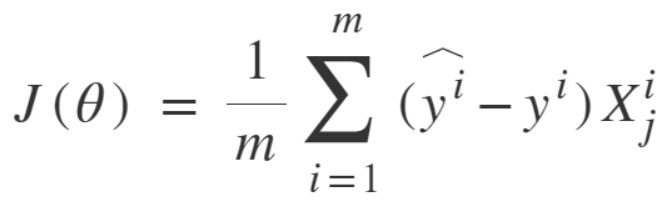

In [174]:
%%time

w_gd = np.zeros((2, 1))
w_gd # - vector of weights for gradient descent

alpha = 0.01
mse_gd = []

for i in range(10000): # - we will do 10 thousands iteration (calculate 10 thousand MSE)
    
    new_w = w_gd.copy() # - create a copy to update w[0] and w[1] simultaneously

    new_w[0] = new_w[0] - alpha * np.sum(np.dot(X_train, w_gd) - y_train.reshape(-1, 1))/X_train.shape[0]
    new_w[1] = new_w[1] - alpha * np.sum((np.dot(X_train, w_gd) - y_train.reshape(-1, 1)) * X_train[:, 1].reshape(-1, 1)/X_train.shape[0])
    
    w_gd = new_w.copy()
    
    mse_gd.append(mean_squared_error(y_test, np.dot(X_test, w_gd)))

CPU times: user 25.3 s, sys: 19.7 s, total: 45 s
Wall time: 14.9 s


In [175]:
mse_gd[-1] # - MSE after 10000th iteration

2.6708307676676313

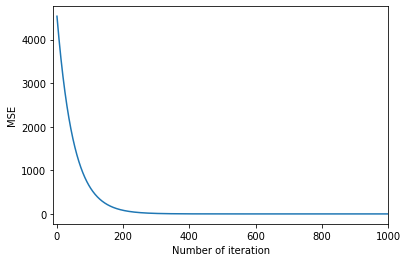

In [185]:
sns.lineplot(y=mse_gd, x=np.arange(1, len(mse_gd) + 1));
plt.xlim([-10, 1000]);
plt.ylabel('MSE');
plt.xlabel('Number of iteration');

### On the graph, we see that the MSE changes dramatically during the first 200 iterations, and then remains close to the minimum.

In [177]:
mse_OLS, mse_gd[-1]

(2.670830767667635, 2.6708307676676313)

## 3. Stochastic Gradient Descent

### In informal words, the distinction between Gradient Descent and Stochastic Gradient Descent is that we don't calculate the sum of derivatives loss function on each iteration.

### We read each observation and change weights simultaneously. Stochastic Gradient Descent is also called Online-learning. It reads and learns at the same time.

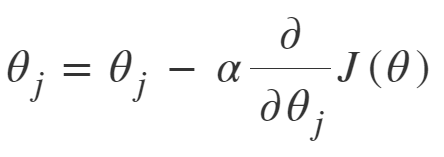

### As we can see, there is no the sum symbol Σ in the formula.

In [178]:
%%time

w_sgd = np.zeros([2, 1])
w_sgd

alpha = 0.01
n_epoch = 1

mse_SGD = []

for i in range(n_epoch): # - number of iteration over whole train dataset (could be more than 1)
    
    for i in range(X_train.shape[0]): # - number of observation in train dataset

        new_w = w_sgd.copy()

        new_w[0] += alpha * (y_train[i] - np.dot(X_train[i], w_sgd))
        new_w[1] += alpha * (y_train[i] - np.dot(X_train[i], w_sgd)) * X_train[i, 1]

        w_sgd = new_w.copy()

        mse_SGD.append(mean_squared_error(y_test, np.dot(X_test, w_sgd)))
        

CPU times: user 27.4 s, sys: 21.5 s, total: 48.9 s
Wall time: 16.3 s


In [179]:
mse_SGD[-1]

2.673979830568334

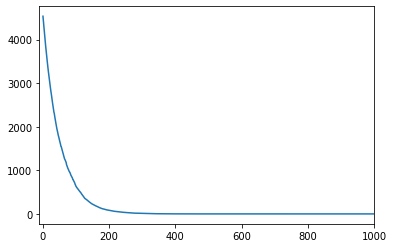

In [180]:
sns.lineplot(y=mse_SGD, x=np.arange(1, X_train.shape[0] * n_epoch + 1));
plt.xlim([-10, 1000]);

### Finally, we will perform sklearn SGDRegressor to compare with our implementation.

In [181]:
SGDReg = SGDRegressor().fit(X_train, y_train)
y_pred_sgd = SGDReg.predict(X_test)

In [182]:
mean_squared_error(y_test, y_pred_sgd)

2.673338544895953

### Implementation results.

In [183]:
print(f'Baseline MSE = {Baseline:.3f}')
print(f'Ordynary Least Square MSE = {mse_OLS:.3f}')
print(f'Gradient Descent MSE = {mse_gd[-1]:.3f}')
print(f'Stochastic Gradient Descent MSE = {mse_SGD[-1]:.3f}')

Baseline MSE = 3.633
Ordynary Least Square MSE = 2.671
Gradient Descent MSE = 2.671
Stochastic Gradient Descent MSE = 2.674
